<a href="https://colab.research.google.com/github/Chen-Tsai-Hsuan/UPAS-classifier/blob/main/UPAS%E6%95%B4%E4%BD%B5%E7%99%BD%E5%90%8D%E5%96%AE%E8%B3%87%E6%96%99%E4%B8%A6%E6%A8%99%E8%A8%98%E5%87%BA%E7%95%B0%E5%B8%B8%E8%A3%9D%E7%BD%AE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# 載入 Excel 並合併所有工作表
xls = pd.ExcelFile("白名單_依欄位分類工作表20250627.xlsx")
sheets = {sheet: xls.parse(sheet) for sheet in xls.sheet_names}
merged_df = pd.concat(sheets.values(), ignore_index=True).drop_duplicates()

# 異常判定函式
def is_suspicious(row):
    if str(row["資產屬性"]).strip() in ["無法辨識", "Other", "Detecting"]:
        return 1
    if str(row["加入方式"]).strip() == "外來設備自動加入":
        return 1
    if pd.isna(row["網卡廠牌"]) or str(row["網卡廠牌"]).strip().lower() in ["", "unknown", "nan"]:
        return 1
    if pd.isna(row["OS"]) or str(row["OS"]).strip().lower() in ["", "nan"]:
        return 1
    return 0

# 加入標記欄位
merged_df["是否為可疑設備"] = merged_df.apply(is_suspicious, axis=1)

# 輸出檔案
output_stats_excel_path = "整併與標記後的設備資料.xlsx"
merged_df.to_excel(output_stats_excel_path, index=False)

# 顯示可下載連結（適用於 Colab 或 Jupyter）
from IPython.display import FileLink
FileLink(output_stats_excel_path)
from google.colab import files
files.download(output_stats_excel_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#勒索風險預測模型結果

import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder

# 讀取資料
df = pd.read_excel("整併與標記後的設備資料.xlsx")

# 選取特徵欄位
features = ["資產屬性", "加入方式", "網卡廠牌", "OS", "所屬群組", "IP類型"]

# Label Encoding
label_encoders = {}
for col in features:
    le = LabelEncoder()
    df[col] = df[col].astype(str).fillna("未知")
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# 建立 Isolation Forest 模型
iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
df["異常分數"] = iso_forest.fit_predict(df[features])
df["異常機率"] = iso_forest.decision_function(df[features]) * -1
df["模型判定為異常"] = (df["異常分數"] == -1).astype(int)

# 儲存結果
df.to_excel("勒索風險預測模型結果.xlsx", index=False)

# 顯示前 10 名異常設備
top10 = df.sort_values(by="異常機率", ascending=False).head(10)
print(top10[["MAC", "IP", "電腦名稱", "異常機率", "模型判定為異常"]])


                     MAC   IP        電腦名稱      異常機率  模型判定為異常
10287  00-50-56-8D-01-D6  NaN  ARPRO-2021  0.118523        1
1730   00-50-56-8D-01-D6  NaN  ARPRO-2021  0.118523        1
13459  00-50-56-8D-01-D6  NaN  ARPRO-2021  0.118523        1
6666   00-50-56-8D-01-D6  NaN  ARPRO-2021  0.118523        1
3536   00-50-56-8D-01-D6  NaN  ARPRO-2021  0.118523        1
12245  00-50-56-8D-01-D6  NaN  ARPRO-2021  0.118523        1
8839   00-50-56-8D-01-D6  NaN  ARPRO-2021  0.118523        1
17283  00-50-56-8D-01-D6  NaN  ARPRO-2021  0.118523        1
16056  00-50-56-8D-01-D6  NaN  ARPRO-2021  0.118523        1
6683   2C-58-B9-88-F4-A5  NaN         NaN  0.110973        1


模型核心技術：Isolation Forest（孤立森林）
Isolation Forest 是一種非監督式異常偵測模型，其原理是：

✅ 正常資料容易「聚在一起」<br>
🚨 異常資料通常在資料空間中「較孤立」或「不尋常」

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32178 (\N{CJK UNIFIED IDEOGRAPH-7DB2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27573 (\N{CJK UNIFIED IDEOGRAPH-6BB5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30064 (\N{CJK UNIFIED IDEOGRAPH-7570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24120 (\N{CJK UNIFIED IDEOGRAPH-5E38}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35373 (\N{CJK UNIFIED IDEOGRAPH-8A2D}) missing from font(s) DejaVu Sans.
  fig.canvas

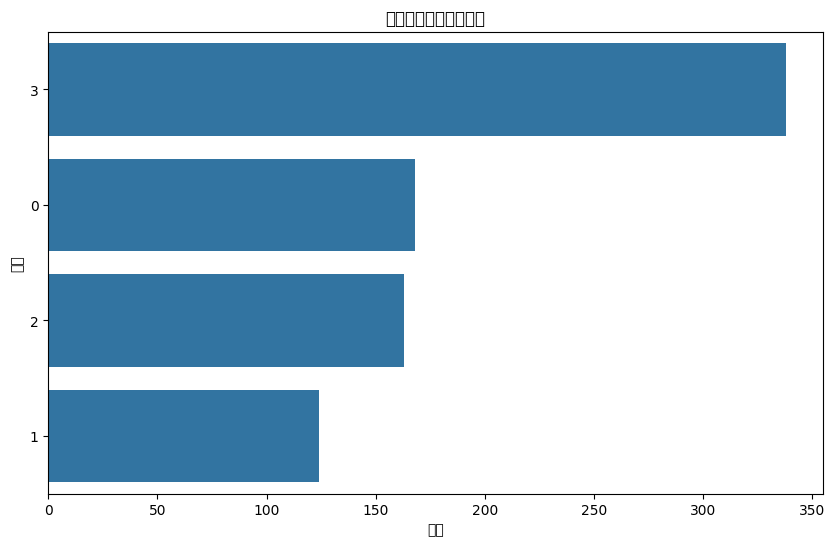

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 32178 (\N{CJK UNIFIED IDEOGRAPH-7DB2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21345 (\N{CJK UNIFIED IDEOGRAPH-5361}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24288 (\N{CJK UNIFIED IDEOGRAPH-5EE0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29260 (\N{CJK UNIFIED IDEOGRAPH-724C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30064 (\N{CJK UNIFIED IDEOGRAPH-7570}) missing from font(s) DejaVu Sans.
  fig.canvas

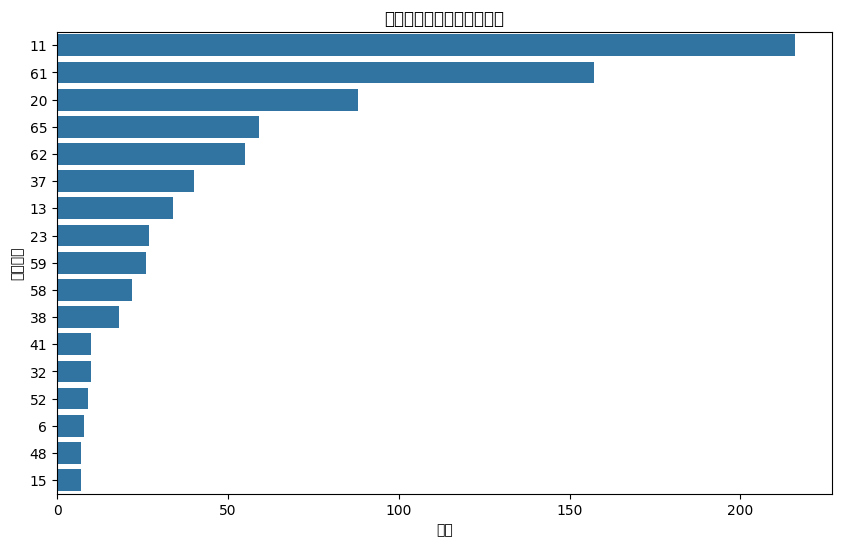

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 21152 (\N{CJK UNIFIED IDEOGRAPH-52A0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20837 (\N{CJK UNIFIED IDEOGRAPH-5165}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26041 (\N{CJK UNIFIED IDEOGRAPH-65B9}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24335 (\N{CJK UNIFIED IDEOGRAPH-5F0F}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30064 (\N{CJK UNIFIED IDEOGRAPH-7570}) missing from font(s) DejaVu Sans.
  fig.canvas

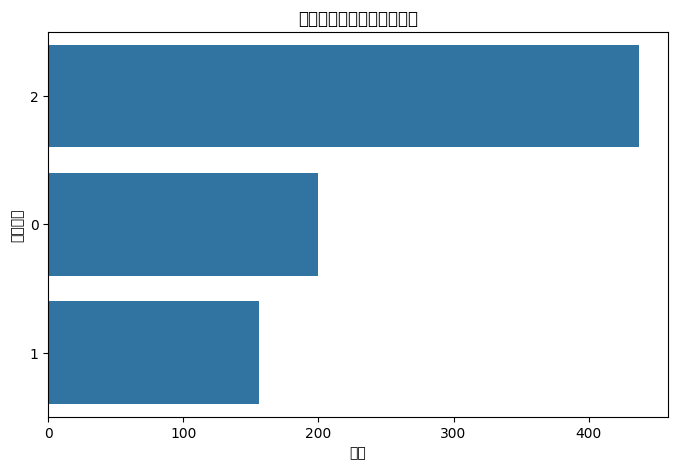

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30064 (\N{CJK UNIFIED IDEOGRAPH-7570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24120 (\N{CJK UNIFIED IDEOGRAPH-5E38}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35373 (\N{CJK UNIFIED IDEOGRAPH-8A2D}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 20633 (\N{CJK UNIFIED IDEOGRAPH-5099}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22312 (\N{CJK UNIFIED IDEOGRAPH-5728}) missing from font(s) DejaVu Sans.
  fig.canvas

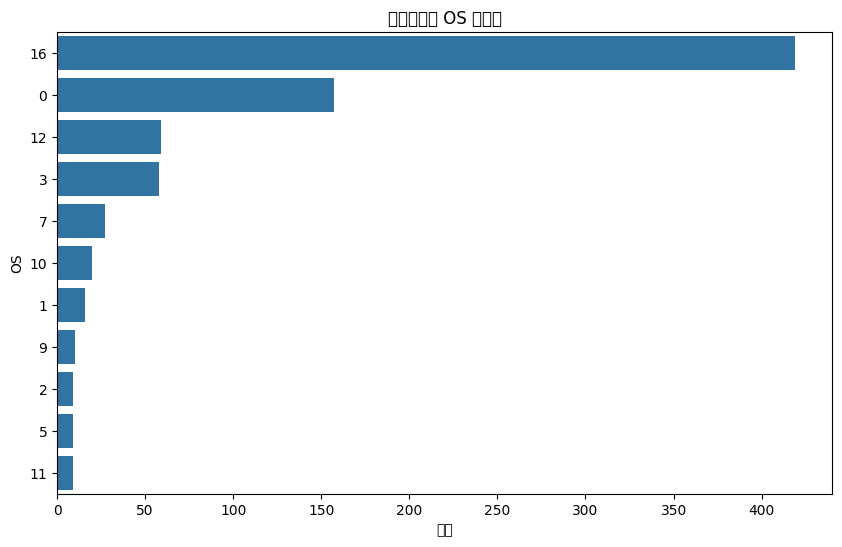

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 36039 (\N{CJK UNIFIED IDEOGRAPH-8CC7}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 29986 (\N{CJK UNIFIED IDEOGRAPH-7522}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 23660 (\N{CJK UNIFIED IDEOGRAPH-5C6C}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24615 (\N{CJK UNIFIED IDEOGRAPH-6027}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30064 (\N{CJK UNIFIED IDEOGRAPH-7570}) missing from font(s) DejaVu Sans.
  fig.canvas

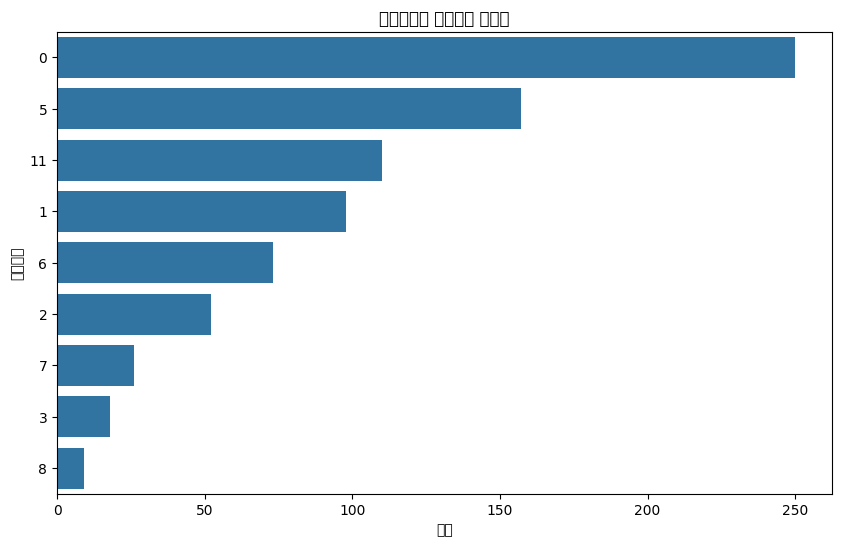

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 39006 (\N{CJK UNIFIED IDEOGRAPH-985E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 30064 (\N{CJK UNIFIED IDEOGRAPH-7570}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 24120 (\N{CJK UNIFIED IDEOGRAPH-5E38}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 35373 (\N{CJK UNIFIED IDEOGRAPH-8A2D}) missing from font(s) DejaVu Sans.
  fig.canvas

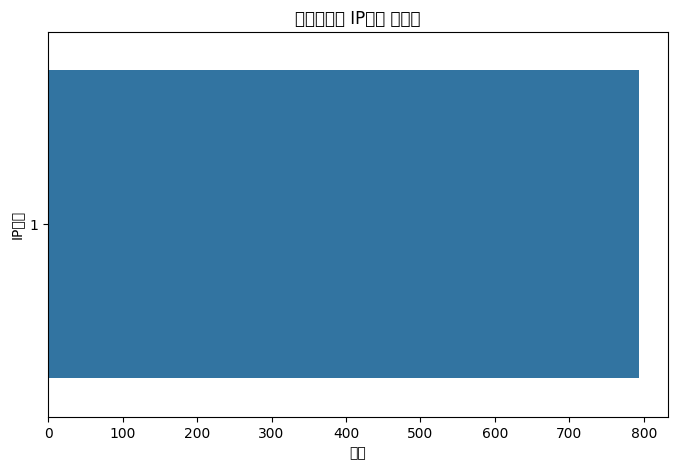

In [ ]:
# prompt: 繪製異常設備的分佈圖（例如：網段、品牌、加入方式分佈）

import matplotlib.pyplot as plt
import seaborn as sns

# 過濾出被模型判定為異常的設備
abnormal_df = df[df['模型判定為異常'] == 1]

# 繪製異常設備在網段的分佈圖
plt.figure(figsize=(10, 6))
sns.countplot(y='所屬群組', data=abnormal_df, order = abnormal_df['所屬群組'].value_counts().index)
plt.title('異常設備在網段的分佈')
plt.xlabel('數量')
plt.ylabel('網段')
plt.show()

# 繪製異常設備在網卡廠牌的分佈圖
plt.figure(figsize=(10, 6))
sns.countplot(y='網卡廠牌', data=abnormal_df, order = abnormal_df['網卡廠牌'].value_counts().index)
plt.title('異常設備在網卡廠牌的分佈')
plt.xlabel('數量')
plt.ylabel('網卡廠牌')
plt.show()

# 繪製異常設備在加入方式的分佈圖
plt.figure(figsize=(8, 5))
sns.countplot(y='加入方式', data=abnormal_df, order = abnormal_df['加入方式'].value_counts().index)
plt.title('異常設備在加入方式的分佈')
plt.xlabel('數量')
plt.ylabel('加入方式')
plt.show()

# 繪製異常設備在 OS 的分佈圖
plt.figure(figsize=(10, 6))
sns.countplot(y='OS', data=abnormal_df, order = abnormal_df['OS'].value_counts().index)
plt.title('異常設備在 OS 的分佈')
plt.xlabel('數量')
plt.ylabel('OS')
plt.show()

# 繪製異常設備在 資產屬性 的分佈圖
plt.figure(figsize=(10, 6))
sns.countplot(y='資產屬性', data=abnormal_df, order = abnormal_df['資產屬性'].value_counts().index)
plt.title('異常設備在 資產屬性 的分佈')
plt.xlabel('數量')
plt.ylabel('資產屬性')
plt.show()

# 繪製異常設備在 IP類型 的分佈圖
plt.figure(figsize=(8, 5))
sns.countplot(y='IP類型', data=abnormal_df, order = abnormal_df['IP類型'].value_counts().index)
plt.title('異常設備在 IP類型 的分佈')
plt.xlabel('數量')
plt.ylabel('IP類型')
plt.show()

In [ ]:
# prompt: 將模型封裝成 API 或報表可定期運行，並產生報表提供下載

# 這個程式碼片段展示如何將模型封裝成一個函式，並產生可下載的報表。
# 若要將此模型封裝成 API 或定期運行，您需要將程式碼遷移到一個可以作為服務運行的環境，例如：
# 1. 使用 Flask 或 FastAPI 建構 Web API。
# 2. 使用 Apache Airflow, Celery 或其他排程工具來定期執行腳本。
# 3. 將程式碼部署到 Google Cloud Functions, Cloud Run, 或 Compute Engine 執行個體。

# 以下是一個將核心邏輯封裝到函式中的範例：

def run_ransomware_prediction_model(excel_file_path):
    """
    運行勒索風險預測模型，生成異常設備報告。

    Args:
        excel_file_path (str): 輸入的 Excel 文件路徑。

    Returns:
        str: 生成的報告 Excel 文件路徑。
    """
    import pandas as pd
    from sklearn.ensemble import IsolationForest
    from sklearn.preprocessing import LabelEncoder
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os # Import os for file path handling

    # 異常判定函式
    def is_suspicious(row):
        if str(row["資產屬性"]).strip() in ["無法辨識", "Other", "Detecting"]:
            return 1
        if str(row["加入方式"]).strip() == "外來設備自動加入":
            return 1
        if pd.isna(row["網卡廠牌"]) or str(row["網卡廠牌"]).strip().lower() in ["", "unknown", "nan"]:
            return 1
        if pd.isna(row["OS"]) or str(row["OS"]).strip().lower() in ["", "nan"]:
            return 1
        return 0

    # 載入 Excel 並合併所有工作表
    try:
        xls = pd.ExcelFile(excel_file_path)
        sheets = {sheet: xls.parse(sheet) for sheet in xls.sheet_names}
        merged_df = pd.concat(sheets.values(), ignore_index=True).drop_duplicates()
    except FileNotFoundError:
        print(f"Error: Input file not found at {excel_file_path}")
        return None
    except Exception as e:
        print(f"Error loading or merging Excel file: {e}")
        return None


    # 加入標記欄位
    merged_df["是否為可疑設備"] = merged_df.apply(is_suspicious, axis=1)

    # 輸出合併與標記後的檔案 (可選，如果需要在中間步驟保存)
    # output_stats_excel_path = "整併與標記後的設備資料.xlsx"
    # merged_df.to_excel(output_stats_excel_path, index=False)
    # print(f"Saved merged and labeled data to {output_stats_excel_path}")


    # 讀取資料 (直接使用合併後的DataFrame)
    df = merged_df.copy()

    # 選取特徵欄位
    features = ["資產屬性", "加入方式", "網卡廠牌", "OS", "所屬群組", "IP類型"]

    # 檢查特徵欄位是否存在
    missing_features = [f for f in features if f not in df.columns]
    if missing_features:
        print(f"Error: Missing required features in the input data: {missing_features}")
        return None

    # Label Encoding
    label_encoders = {}
    for col in features:
        le = LabelEncoder()
        df[col] = df[col].astype(str).fillna("未知")
        # 處理 LabelEncoder 中未知類別的問題，使用 handle_unknown='ignore' 在fit階段會報錯
        # 更好的做法是先 fit 所有可能的類別，或者使用 OrdinalEncoder 並設定 handle_unknown='use_encoded_value'
        # 這裡暫時假設數據沒有太多fit時未見的類別，或可先用value_counts過濾低頻次類別
        try:
            df[col] = le.fit_transform(df[col])
            label_encoders[col] = le
        except Exception as e:
             print(f"Error during Label Encoding for column {col}: {e}")
             # 可以選擇移除該欄位或跳過
             features.remove(col)
             print(f"Removing column {col} from features due to encoding error.")


    # 建立 Isolation Forest 模型
    if not features:
        print("Error: No valid features left after processing.")
        return None

    try:
        iso_forest = IsolationForest(n_estimators=100, contamination=0.05, random_state=42)
        df["異常分數"] = iso_forest.fit_predict(df[features])
        # 計算異常機率，Isolation Forest 的 decision_function 越大越靠近正常，所以取反
        df["異常機率"] = iso_forest.decision_function(df[features]) * -1
        df["模型判定為異常"] = (df["異常分數"] == -1).astype(int)
    except Exception as e:
        print(f"Error during Isolation Forest modeling: {e}")
        return None


    # 儲存結果
    output_report_excel_path = "勒索風險預測模型結果.xlsx"
    try:
        df.to_excel(output_report_excel_path, index=False)
        print(f"Generated report saved to {output_report_excel_path}")
    except Exception as e:
        print(f"Error saving report to Excel: {e}")
        return None

    # 顯示前 10 名異常設備
    # 為了方便查閱原始值，這裡將編碼後的特徵轉換回原始值（僅顯示）
    df_display = df.copy()
    for col in features:
        if col in label_encoders:
            # 使用 inverse_transform 需要小心，因為如果原始數據有NaN被填充為"未知"
            # 且"未知"在fit_transform時沒有出現，inverse_transform可能會報錯
            # 這裡假設fill_na("未知")的"未知"在fit_transform時被納入類別中
            # 如果不行，則需要更穩健的處理，例如映射回原始數據框的對應值
            try:
                 df_display[col + '_原始'] = label_encoders[col].inverse_transform(df[col])
            except Exception as e:
                 print(f"Warning: Could not inverse transform column {col}: {e}")
                 df_display[col + '_原始'] = "無法逆轉換"


    top10 = df_display.sort_values(by="異常機率", ascending=False).head(10)
    print("\n--- 前 10 名異常設備 ---")
    # 顯示原始值和一些關鍵欄位
    display_cols = ["MAC", "IP", "電腦名稱", "異常機率", "模型判定為異常"] + [f + '_原始' for f in features if f + '_原始' in df_display.columns]
    # 過濾掉不存在的欄位，以防萬一
    display_cols = [col for col in display_cols if col in top10.columns]
    print(top10[display_cols])
    print("-------------------------\n")


    # 繪製圖表 (在無頭環境下運行時可能需要特殊設定，例如使用agg後端)
    # For a service/API, you might save these plots to files instead of displaying them directly.
    print("Generating plots (may not display in a headless environment)...")
    try:
        abnormal_df = df[df['模型判定為異常'] == 1]

        if not abnormal_df.empty:
            # 繪製異常設備在網段的分佈圖
            plt.figure(figsize=(10, 6))
            sns.countplot(y='所屬群組', data=abnormal_df, order = abnormal_df['所屬群組'].value_counts().index)
            plt.title('異常設備在網段的分佈')
            plt.xlabel('數量')
            plt.ylabel('網段')
            plt.tight_layout() # 調整佈局防止標籤重疊
            # plt.show() # 在服務中不顯示，可以保存
            plt.savefig("異常設備在網段的分佈.png") # 保存圖片
            plt.close() # 關閉圖形，釋放記憶體

            # 繪製異常設備在網卡廠牌的分佈圖
            plt.figure(figsize=(10, 6))
            sns.countplot(y='網卡廠牌', data=abnormal_df, order = abnormal_df['網卡廠牌'].value_counts().index)
            plt.title('異常設備在網卡廠牌的分佈')
            plt.xlabel('數量')
            plt.ylabel('網卡廠牌')
            plt.tight_layout()
            # plt.show()
            plt.savefig("異常設備在網卡廠牌的分佈.png")
            plt.close()

            # 繪製異常設備在加入方式的分佈圖
            plt.figure(figsize=(8, 5))
            sns.countplot(y='加入方式', data=abnormal_df, order = abnormal_df['加入方式'].value_counts().index)
            plt.title('異常設備在加入方式的分佈')
            plt.xlabel('數量')
            plt.ylabel('加入方式')
            plt.tight_layout()
            # plt.show()
            plt.savefig("異常設備在加入方式的分佈.png")
            plt.close()

            # 繪製異常設備在 OS 的分佈圖
            plt.figure(figsize=(10, 6))
            sns.countplot(y='OS', data=abnormal_df, order = abnormal_df['OS'].value_counts().index)
            plt.title('異常設備在 OS 的分佈')
            plt.xlabel('數量')
            plt.ylabel('OS')
            plt.tight_layout()
            # plt.show()
            plt.savefig("異常設備在OS的分佈.png")
            plt.close()

            # 繪製異常設備在 資產屬性 的分佈圖
            plt.figure(figsize=(10, 6))
            sns.countplot(y='資產屬性', data=abnormal_df, order = abnormal_df['資產屬性'].value_counts().index)
            plt.title('異常設備在 資產屬性 的分佈')
            plt.xlabel('數量')
            plt.ylabel('資產屬性')
            plt.tight_layout()
            # plt.show()
            plt.savefig("異常設備在資產屬性的分佈.png")
            plt.close()


            # 繪製異常設備在 IP類型 的分佈圖
            plt.figure(figsize=(8, 5))
            sns.countplot(y='IP類型', data=abnormal_df, order = abnormal_df['IP類型'].value_counts().index)
            plt.title('異常設備在 IP類型 的分佈')
            plt.xlabel('數量')
            plt.ylabel('IP類型')
            plt.tight_layout()
            # plt.show()
            plt.savefig("異常設備在IP類型的分佈.png")
            plt.close()

            print("Plots saved as PNG files.")

        else:
            print("No abnormal devices detected to generate plots.")

    except Exception as e:
        print(f"Error generating plots: {e}")


    return output_report_excel_path

# --- 如何使用這個函式 ---

# 假設你的輸入檔案叫做 "白名單_依欄位分類工作表20250627.xlsx"
input_file = "白名單_依欄位分類工作表20250627.xlsx"

# 運行模型並獲取報告檔案路徑
report_file_path = run_ransomware_prediction_model(input_file)

if report_file_path:
    print(f"\nModel execution finished. Report generated at: {report_file_path}")

    # 在 Colab 或 Jupyter 中提供下載連結
    from IPython.display import FileLink
    from google.colab import files

    print("\nDownload the report:")
    display(FileLink(report_file_path))

    # 或直接觸發下載 (只適用於 Colab)
    print("Initiating direct download (Colab only)...")
    try:
        files.download(report_file_path)
        # 下載生成的圖片 (如果有的話)
        for plot_file in ["異常設備在網段的分佈.png", "異常設備在網卡廠牌的分佈.png",
                          "異常設備在加入方式的分佈.png", "異常設備在OS的分佈.png",
                          "異常設備在資產屬性的分佈.png", "異常設備在IP類型的分佈.png"]:
            if os.path.exists(plot_file):
                 print(f"Initiating direct download for plot: {plot_file}")
                 files.download(plot_file)

    except Exception as e:
        print(f"Error during direct download: {e}")
        print("Please use the FileLink above to download manually.")

else:
    print("\nModel execution failed.")



Generated report saved to 勒索風險預測模型結果.xlsx

--- 前 10 名異常設備 ---
                     MAC   IP        電腦名稱      異常機率  模型判定為異常 資產屬性_原始 加入方式_原始  \
10287  00-50-56-8D-01-D6  NaN  ARPRO-2021  0.118523        1     伺服器    手動新增   
1730   00-50-56-8D-01-D6  NaN  ARPRO-2021  0.118523        1     伺服器    手動新增   
13459  00-50-56-8D-01-D6  NaN  ARPRO-2021  0.118523        1     伺服器    手動新增   
6666   00-50-56-8D-01-D6  NaN  ARPRO-2021  0.118523        1     伺服器    手動新增   
3536   00-50-56-8D-01-D6  NaN  ARPRO-2021  0.118523        1     伺服器    手動新增   
12245  00-50-56-8D-01-D6  NaN  ARPRO-2021  0.118523        1     伺服器    手動新增   
8839   00-50-56-8D-01-D6  NaN  ARPRO-2021  0.118523        1     伺服器    手動新增   
17283  00-50-56-8D-01-D6  NaN  ARPRO-2021  0.118523        1     伺服器    手動新增   
16056  00-50-56-8D-01-D6  NaN  ARPRO-2021  0.118523        1     伺服器    手動新增   
6683   2C-58-B9-88-F4-A5  NaN         NaN  0.110973        1     偵測中    手動新增   

      網卡廠牌_原始                OS_原始 所屬群組_原始 IP類型_原始  
1028

/tmp/ipython-input-6-2997371436.py:156: UserWarning: Glyph 25976 (\N{CJK UNIFIED IDEOGRAPH-6578}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 調整佈局防止標籤重疊
/tmp/ipython-input-6-2997371436.py:156: UserWarning: Glyph 37327 (\N{CJK UNIFIED IDEOGRAPH-91CF}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 調整佈局防止標籤重疊
/tmp/ipython-input-6-2997371436.py:156: UserWarning: Glyph 32178 (\N{CJK UNIFIED IDEOGRAPH-7DB2}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 調整佈局防止標籤重疊
/tmp/ipython-input-6-2997371436.py:156: UserWarning: Glyph 27573 (\N{CJK UNIFIED IDEOGRAPH-6BB5}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 調整佈局防止標籤重疊
/tmp/ipython-input-6-2997371436.py:156: UserWarning: Glyph 30064 (\N{CJK UNIFIED IDEOGRAPH-7570}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 調整佈局防止標籤重疊
/tmp/ipython-input-6-2997371436.py:156: UserWarning: Glyph 24120 (\N{CJK UNIFIED IDEOGRAPH-5E38}) missing from font(s) DejaVu Sans.
  plt.tight_layout() # 調整佈局防止標籤重疊
/tmp

Plots saved as PNG files.

Model execution finished. Report generated at: 勒索風險預測模型結果.xlsx

Download the report:


/tmp/ipython-input-6-2997371436.py:212: UserWarning: Glyph 24120 (\N{CJK UNIFIED IDEOGRAPH-5E38}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-6-2997371436.py:212: UserWarning: Glyph 35373 (\N{CJK UNIFIED IDEOGRAPH-8A2D}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-6-2997371436.py:212: UserWarning: Glyph 20633 (\N{CJK UNIFIED IDEOGRAPH-5099}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-6-2997371436.py:212: UserWarning: Glyph 22312 (\N{CJK UNIFIED IDEOGRAPH-5728}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-6-2997371436.py:212: UserWarning: Glyph 39006 (\N{CJK UNIFIED IDEOGRAPH-985E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-6-2997371436.py:212: UserWarning: Glyph 22411 (\N{CJK UNIFIED IDEOGRAPH-578B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-6-2997371436.py:212: UserWarning: Glyph 30340 (\N{CJK UNIFIED I

/content/勒索風險預測模型結果.xlsx

Initiating direct download (Colab only)...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Error during direct download: name 'os' is not defined
Please use the FileLink above to download manually.
